# Build Metadata.csv

## Columns:

* StationID: str
* lat: float
* lon: float
* availability: list of years: String or Int
* ....

In [26]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

---
# 1) Get a list of available files:

In [4]:
url = "https://www.ndbc.noaa.gov/data/historical/stdmet/"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    body = soup.body
else:
    print('Error fetching website.')

KeyboardInterrupt: 

In [67]:
pattern = r'\xa0\n(.*?\.txt\.gz)'  # Example: \xa0\n0y2w3h2012.txt.gz
file_names = re.findall(pattern, body.text)
file_names

['0y2w3h2012.txt.gz',
 '0y2w3h2013.txt.gz',
 '0y2w3h2014.txt.gz',
 '0y2w3h2015.txt.gz',
 '4cONFh2020.txt.gz',
 '4h361h2017.txt.gz',
 '4h361h2020.txt.gz',
 '4h361h2021.txt.gz',
 '4h363h2020.txt.gz',
 '4h363h2021.txt.gz',
 '4h364h2017.txt.gz',
 '4h365h2020.txt.gz',
 '4h365h2021.txt.gz',
 '4h390h2017.txt.gz',
 '4h390h2020.txt.gz',
 '4h390h2021.txt.gz',
 '4h394h2017.txt.gz',
 '4h394h2020.txt.gz',
 '4h394h2021.txt.gz',
 '18ci3h2014.txt.gz',
 '18ci3h2015.txt.gz',
 '20cm4h2014.txt.gz',
 '20cm4h2015.txt.gz',
 '32st1h2009.txt.gz',
 '32st1h2010.txt.gz',
 '32st1h2022.txt.gz',
 '32st2h2007.txt.gz',
 '32st2h2008.txt.gz',
 '32st2h2009.txt.gz',
 '32st2h2010.txt.gz',
 '32st2h2011.txt.gz',
 '32st2h2012.txt.gz',
 '32st2h2013.txt.gz',
 '32st2h2014.txt.gz',
 '32st2h2015.txt.gz',
 '32st2h2016.txt.gz',
 '32st2h2017.txt.gz',
 '32st2h2018.txt.gz',
 '32st2h2019.txt.gz',
 '32st2h2020.txt.gz',
 '32st2h2021.txt.gz',
 '41nt1h2007.txt.gz',
 '41nt1h2008.txt.gz',
 '41nt1h2009.txt.gz',
 '41nt1h2010.txt.gz',
 '41nt1h20

In [68]:
available_files = {}

for filename in file_names:

    pattern = r'(.+?)h(\d{4})\.txt\.gz'
    match = re.match(pattern, filename)

    station = match.group(1)
    year = int(match.group(2))

    if station not in available_files:
        available_files[station] = { year }
    else:
        available_files[station].add(year)

In [69]:
available_files

{'0y2w3': {2012, 2013, 2014, 2015},
 '4cONF': {2020},
 '4h361': {2017, 2020, 2021},
 '4h363': {2020, 2021},
 '4h364': {2017},
 '4h365': {2020, 2021},
 '4h390': {2017, 2020, 2021},
 '4h394': {2017, 2020, 2021},
 '18ci3': {2014, 2015},
 '20cm4': {2014, 2015},
 '32st1': {2009, 2010, 2022},
 '32st2': {2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021},
 '41nt1': {2007,
  2008,
  2009,
  2010,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022},
 '41nt2': {2008, 2010},
 '42a02': {2000},
 '42a03': {2000},
 '42otp': {2000},
 '43WSL': {2019, 2020},
 '45T01': {2018},
 '46a35': {2001},
 '46a54': {1996},
 '51wh1': {2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022},
 '51wh2': {2007, 2008, 2009, 2010, 2011, 2012},
 '53ANF': {2020},
 '53MKF': {2020},
 '23020': {2008, 2009, 2010},
 '31201': {2005},
 '32012': {2007,
  2008,
  2009,
 

available_files is a dictionary of stations. The value of each station is a set of the years, where a file exists!

In [70]:
# create a list of all years in the sets
all_years = sorted(list(set.union(*[value for value in available_files.values()])))

# create an empty DataFrame with columns as years and index as dictionary keys
metadata_0 = pd.DataFrame(index=available_files.keys(), columns=all_years)

# fill the DataFrame with Boolean values
for key, value in available_files.items():
    for year in all_years:
        metadata_0.loc[key, year] = year in value

# print the DataFrame
print(metadata_0)

        1970   1971   1972   1973   1974   1975   1976   1977   1978   1979  \
0y2w3  False  False  False  False  False  False  False  False  False  False   
4cONF  False  False  False  False  False  False  False  False  False  False   
4h361  False  False  False  False  False  False  False  False  False  False   
4h363  False  False  False  False  False  False  False  False  False  False   
4h364  False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
yabp4  False  False  False  False  False  False  False  False  False  False   
yata2  False  False  False  False  False  False  False  False  False  False   
ygnn6  False  False  False  False  False  False  False  False  False  False   
ykrv2  False  False  False  False  False  False  False  False  False  False   
yktv2  False  False  False  False  False  False  False  False  False  False   

       ...   2013   2014   2015   2016   2017   201

---
# 2) Scrape data from station-pages

In [79]:
metadata_1 = metadata_0.copy()
metadata_1['owner'] = pd.Series(dtype=str)
metadata_1['type'] = pd.Series(dtype=str)
metadata_1['lat'] = pd.Series(dtype=float)
metadata_1['lon'] = pd.Series(dtype=float)
metadata_1

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
0y2w3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
4cONF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,NaN,NaN,NaN,NaN
4h361,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,NaN,NaN,NaN,NaN
4h363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,NaN,NaN,NaN,NaN
4h364,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yabp4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,NaN,NaN,NaN,NaN
yata2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NaN,NaN,NaN,NaN
ygnn6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,NaN,NaN,NaN,NaN
ykrv2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NaN,NaN,NaN,NaN


In [80]:
def scrape_metadata(StationID):
    url = f"https://www.ndbc.noaa.gov/station_page.php?station={StationID}"
    response = requests.get(url)
    #print(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        body = soup.body
        metadata = body.find('div', id='stn_metadata')
        return metadata
    else:
        print('Error fetching website.')
        return None

In [81]:
def convert_coordinate_string_to_float(coord_str):
    # Split the coordinate string into the numeric value and the direction
    numeric_str, direction = coord_str.split()

    # Convert the numeric string to a float value
    numeric_val = float(numeric_str)

    # If the direction is South or West, negate the numeric value
    if direction in ['S', 'W']:
        numeric_val *= -1

    return numeric_val

In [104]:
def webscraper(station_id):
     html_metadata = scrape_metadata(station_id)
     if html_metadata is not None:

        b_tags = html_metadata.find_all('b')
        owner = b_tags[0].text.replace('Owned and maintained by', '').strip()

        station_type = b_tags[1].text

        #COORDINATES
        metadata_string = html_metadata.prettify() #return as string
        match = re.search(r'(\d+\.\d+ [NS]) (\d+\.\d+ [EW])', metadata_string)
        latitude = match.group(1)
        longitude = match.group(2)
        lat = convert_coordinate_string_to_float(latitude)
        lon = convert_coordinate_string_to_float(longitude)

        #print("owner:", owner)
        #print("type:", station_type)
        return owner, station_type, lat, lon

     else:
         return "", "", np.NAN, np.NAN

In [105]:
owner, station_type, lat, lon = webscraper("45T01")

<re.Match object; span=(202, 219), match='48.008 N 87.666 W'>


In [83]:
metadata_2 = metadata_1.copy()
for index, row in metadata_2.iterrows():
    # code to be executed for each row
    # access the values in the row using row['column_name'] or row[column_index]
    if np.isnan(row["lat"]) or np.isnan(row["lon"]):
        owner, station_type, lat, lon = webscraper(index)
        metadata_2.at[index, "owner"] = owner
        metadata_2.at[index, "type"] = station_type
        metadata_2.at[index, "lat"] = lat
        metadata_2.at[index, "lon"] = lon

Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching website.
Error fetching w

----

In [84]:
metadata_2['owner'].replace('National Data Buoy Center', 'NDBC', inplace=True)
metadata_2

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
0y2w3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,44.794,-87.313
4cONF,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,,,NaN,NaN
4h361,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,,,NaN,NaN
4h363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,,,NaN,NaN
4h364,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yabp4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,Station operated by Puerto Rico Seismic Network,Water Level Observation Network,18.055,-65.833
yata2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service,Water Level Observation Network,59.548,-139.733
ygnn6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,National Weather Service Eastern Region,GLOS Weather Station,43.262,-79.064
ykrv2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service Physical Oceanog...,Water Level Observation Network,37.251,-76.342


In [85]:
metadata_2["lon"].isna().sum()

48

In [86]:
metadata_2["owner"].isna().sum()

0

In [87]:
metadata_2["type"].isna().sum()

0

---
# Saving to fies

In [88]:
metadata_3 = metadata_2.dropna(subset=['lat', 'lon']) #Remove all stations which do not provide GPS coordinates!
metadata_3.index.name = "StationID"
#metadata_3.index = metadata_3.index.str.upper()

metadata_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
StationID,,,,,,,,,,,,,,,,,,,,,
0y2w3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,44.794,-87.313
18ci3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,41.730,-86.910
20cm4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,42.090,-86.490
45T01,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,NDBC,2.1-meter ionomer foam buoy,48.008,-87.666
23020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,King Abdullah University of Science and Techno...,Buoy,22.162,38.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yabp4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,Station operated by Puerto Rico Seismic Network,Water Level Observation Network,18.055,-65.833
yata2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service,Water Level Observation Network,59.548,-139.733
ygnn6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,National Weather Service Eastern Region,GLOS Weather Station,43.262,-79.064


In [89]:
from datetime import datetime

# Get today's date as a datetime object
today = datetime.today().strftime('%Y_%m_%d')
metadata_3.to_csv(f"../data/metadata/metadata_{today}.csv", index=True)

---
# Metadata Analysis

In [8]:
metadata = pd.read_csv(f"../data/metadata/metadata_2023_05_24.csv")
metadata

,StationID,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2017,2018,2019,2020,2021,2022,owner,type,lat,lon
0,0y2w3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,44.794,-87.313
1,18ci3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,41.730,-86.910
2,20cm4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,Marine Reporting Station (MARS) owned and oper...,Weather Station,42.090,-86.490
3,45T01,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,NDBC,2.1-meter ionomer foam buoy,48.008,-87.666
4,23020,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,King Abdullah University of Science and Techno...,Buoy,22.162,38.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,yabp4,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,Station operated by Puerto Rico Seismic Network,Water Level Observation Network,18.055,-65.833
1243,yata2,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service,Water Level Observation Network,59.548,-139.733
1244,ygnn6,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,National Weather Service Eastern Region,GLOS Weather Station,43.262,-79.064
1245,ykrv2,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,NOAA's National Ocean Service Physical Oceanog...,Water Level Observation Network,37.251,-76.342


In [16]:
condition = metadata.columns.str.isnumeric()
availability = metadata.loc[:, condition]
availability

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
1243,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1244,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
1245,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [20]:
rows_with_only_false = availability.index[(availability == False).all(axis=1)]
columns_with_only_false = availability.columns[(availability == False).all()]
print(rows_with_only_false)
print(columns_with_only_false)

Int64Index([], dtype='int64')
Index([], dtype='object')


In [22]:
num_of_files = (availability == True).sum().sum()
num_of_files

14724

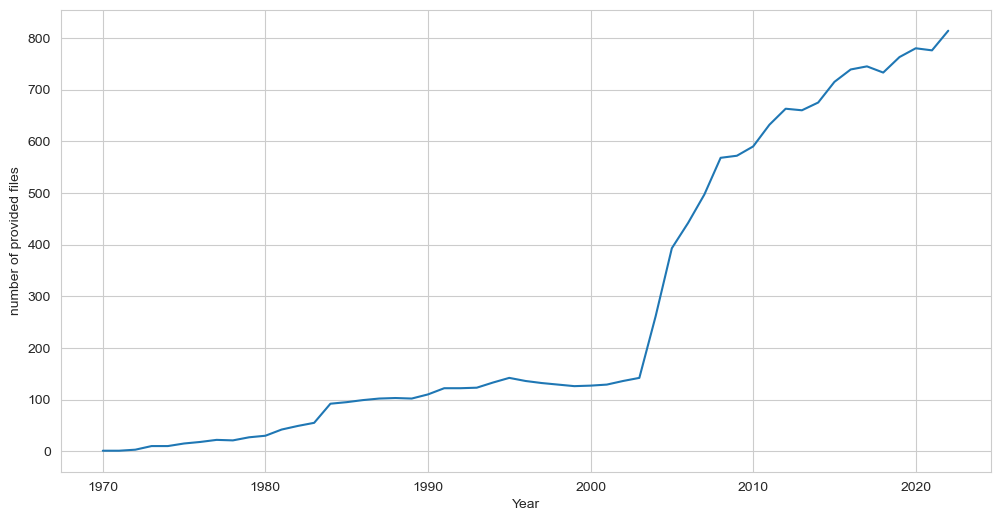

In [38]:
availability.sum().plot(kind='line', figsize=(12,6))

plt.xlabel('Year')
plt.ylabel('number of provided files')

# Show the plot
plt.show()

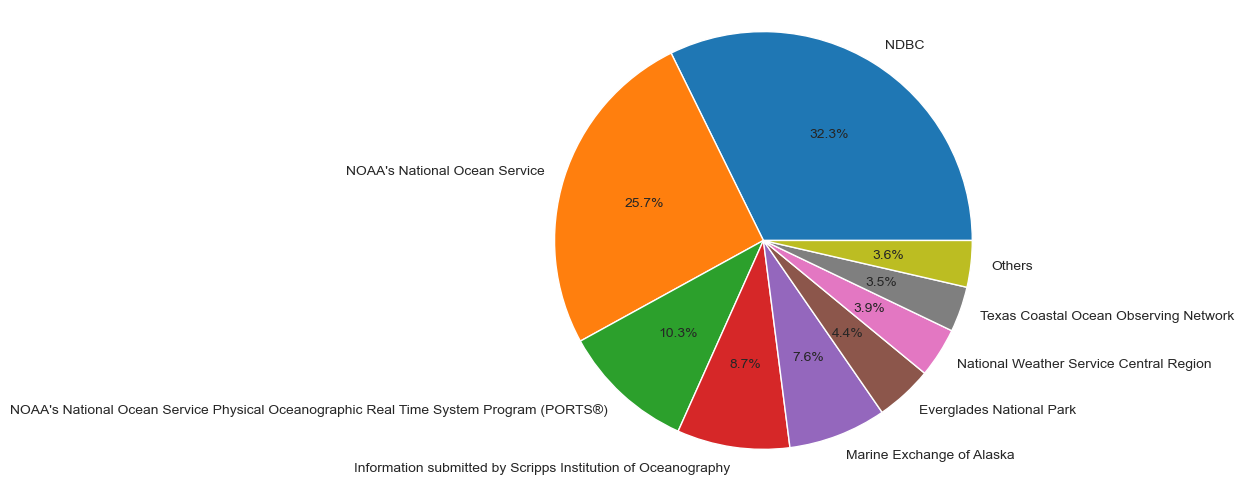

In [47]:
owner_counts = metadata['owner'].value_counts()

# Calculate percentages and filter owners below 2%
total_owners = sum(owner_counts)
percentages = (owner_counts / total_owners) * 100
filtered_indices = percentages >= 2

# Calculate the sum of filtered percentages for "others"
others_percentage = percentages[~filtered_indices].sum()

# Create new lists of labels and counts
filtered_labels = owner_counts.index[filtered_indices].tolist()
filtered_counts = owner_counts[filtered_indices].tolist()
filtered_labels.append("Others")
filtered_counts.append(others_percentage)


# Plot the modified pie chart
plt.figure(figsize=(8, 6))
plt.pie(filtered_counts, labels=filtered_labels, autopct='%1.1f%%')
#plt.title('Distribution of Owners')
plt.axis('equal')
plt.show()

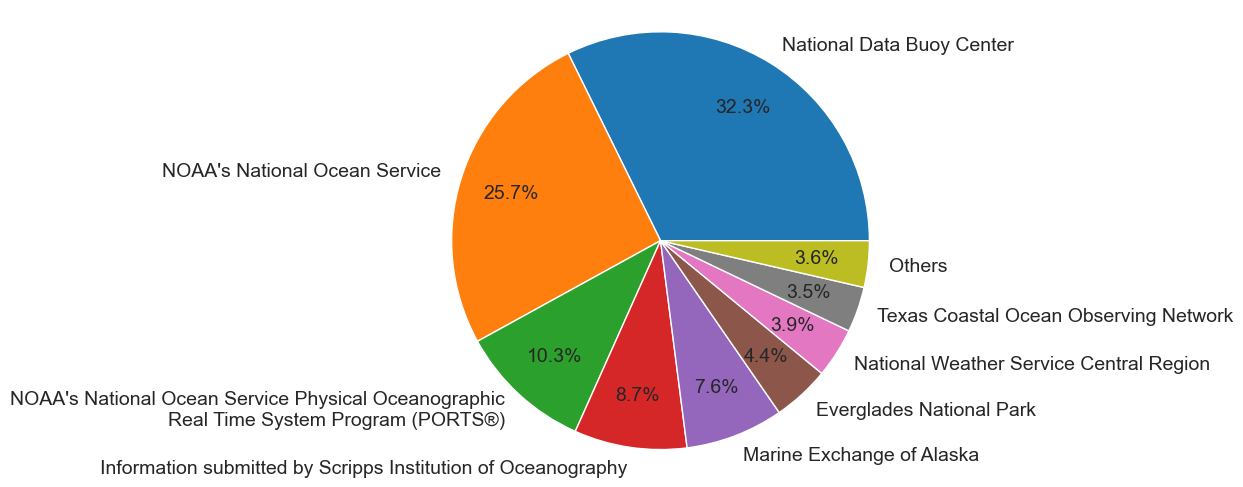

In [50]:
filtered_labels[0] = "National Data Buoy Center"                    #Take care that this does not overwrite anything else than NDBC!
filtered_labels[2] = "NOAA's National Ocean Service Physical Oceanographic\nReal Time System Program (PORTS®)"
plt.figure(figsize=(8, 6))
plt.pie(filtered_counts, labels=filtered_labels, autopct='%1.1f%%',pctdistance=0.75, textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

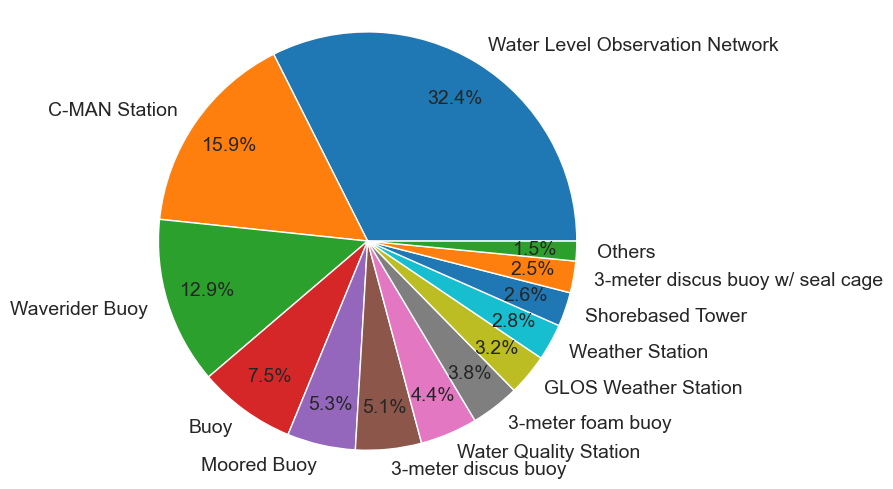

In [52]:
type_counts = metadata['type'].value_counts()

# Calculate percentages and filter owners below 2%
total_types = sum(type_counts)
percentages = (type_counts / total_types) * 100
filtered_indices = percentages >= 2

# Calculate the sum of filtered percentages for "others"
others_percentage = percentages[~filtered_indices].sum()

# Create new lists of labels and counts
filtered_labels = type_counts.index[filtered_indices].tolist()
filtered_counts = type_counts[filtered_indices].tolist()
filtered_labels.append("Others")
filtered_counts.append(others_percentage)

# Plot the modified pie chart
plt.figure(figsize=(8, 6))
plt.pie(filtered_counts, labels=filtered_labels, autopct='%1.1f%%',pctdistance=0.8, textprops={'fontsize': 14})
plt.axis('equal')
plt.show()